<a href="https://colab.research.google.com/github/jmanani5/Data-visualization/blob/master/Histogram_%26_Density_Plot_Flight_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import pandas as pd

In [0]:
url = 'https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv'

In [0]:
data = requests.get(url).text

In [0]:
lines = []
for i in data.split('\n'):
  lines.append(i.strip('\r').split(','))

In [0]:
flights = pd.DataFrame(lines[1:])

In [0]:
flights.drop(0,axis=1,inplace=True)

In [0]:
flights.rename(columns={0:lines[0][0],1:lines[0][1],2:lines[0][2]}, inplace=True)

In [46]:
flights.shape

(317114, 2)

In [47]:
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
flights['arr_delay'].fillna('0', inplace =True)

#take care of the datatype. If it;s strign it will not going to make you a graph
flights['arr_delay'] = flights['arr_delay'].apply(lambda x: float(x))

In [60]:
flights.shape

(317114, 2)

Text(0, 0.5, 'Flights')

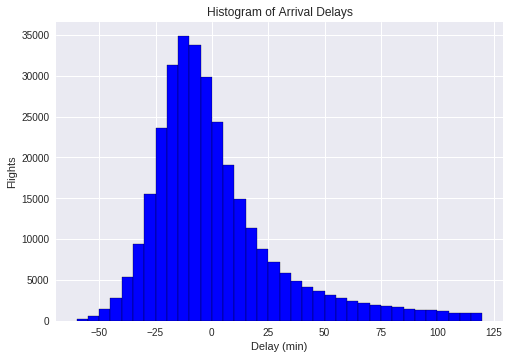

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(flights.arr_delay, color = 'blue', edgecolor = 'black',
         bins = int(180/5))

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

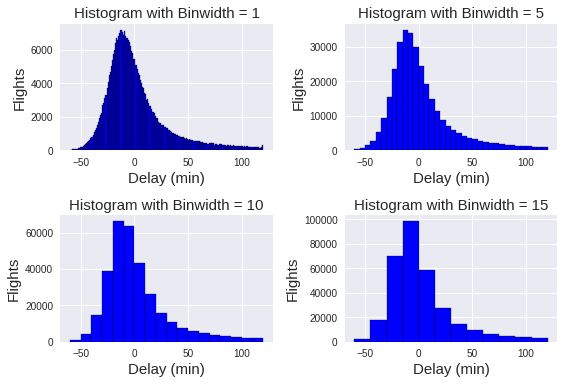

In [75]:
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 15)
    ax.set_xlabel('Delay (min)', size = 15)
    ax.set_ylabel('Flights', size= 15)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

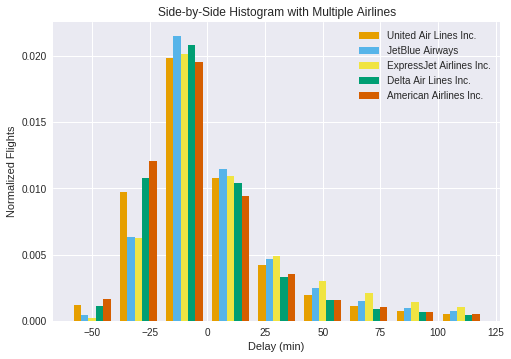

In [81]:
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/20), density=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

([array([0.00017083, 0.00116771, 0.00370547, 0.00476932, 0.00287629,
         0.00138281, 0.00072901, 0.00044126, 0.00027838, 0.00020857,
         0.00015579, 0.00010755]),
  array([0.00023071, 0.0016487 , 0.00660049, 0.00970267, 0.00570491,
         0.0027801 , 0.00152895, 0.0009407 , 0.00061805, 0.00046169,
         0.0003462 , 0.00026164]),
  array([0.00024915, 0.00202385, 0.00927559, 0.01396092, 0.00822649,
         0.00405252, 0.00234649, 0.00154172, 0.00106158, 0.00080392,
         0.00061266, 0.00047276]),
  array([0.00038905, 0.00302385, 0.01269644, 0.01803103, 0.01054121,
         0.00500826, 0.00281074, 0.00184167, 0.00125143, 0.00094183,
         0.0007256 , 0.00055278]),
  array([0.00051816, 0.00391319, 0.01505031, 0.02054609, 0.01195296,
         0.0056544 , 0.00312885, 0.00203719, 0.00139359, 0.00104314,
         0.00080591, 0.00062288])],
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 Lists of Patches objects

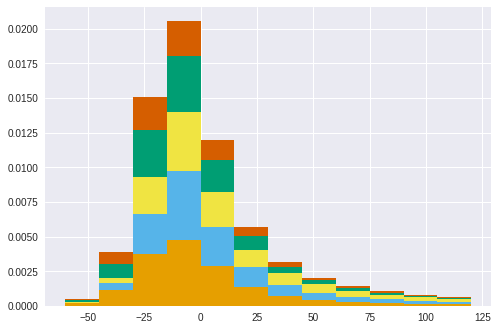

In [86]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         density=True, color = colors, label=names)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


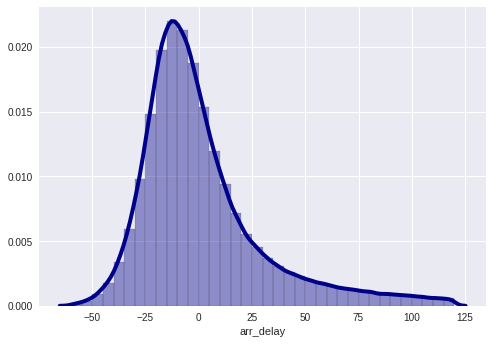

In [87]:
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

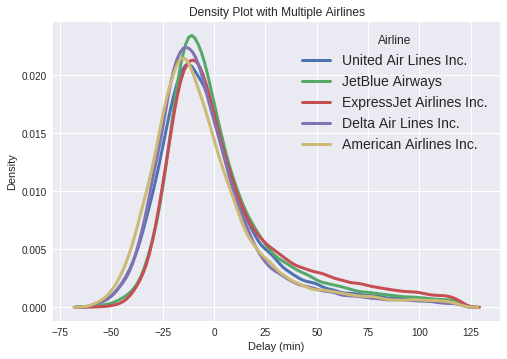

In [93]:
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 14}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

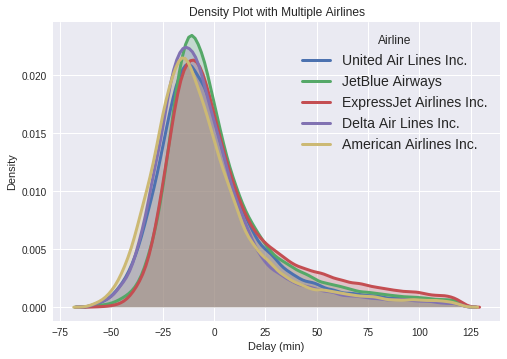

In [97]:
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines[:]:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)
    
# Plot formatting
plt.legend(prop={'size': 14}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

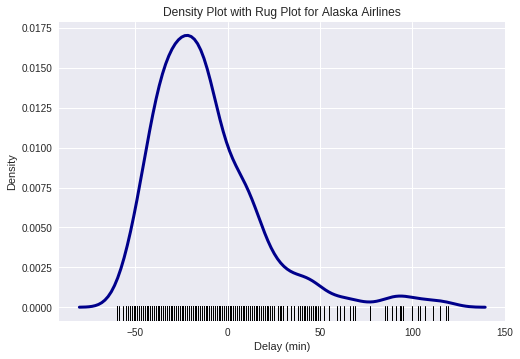

In [98]:
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

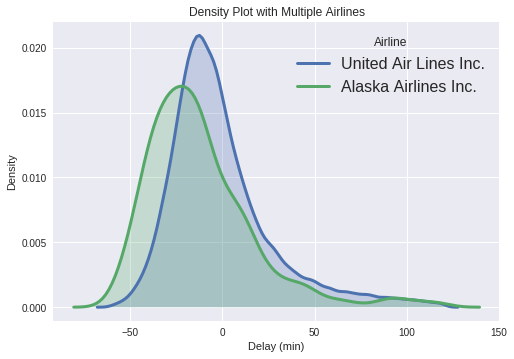

In [100]:
airlines = ['United Air Lines Inc.', 'Alaska Airlines Inc.']

for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade' : True,'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [103]:
sample = flights.arr_delay.sample(n=1000, random_state = 1)
sample.mean()

1.202

In [0]:
samples_mean = []
samples_std = []
j = 0
itr = 0
while itr < 100:
  j += 1
  sample = flights.arr_delay.sample(n=1000, random_state=j)
  sample_mean = sample.mean()
  sample_std = sample.std()
  samples_mean.append(sample_mean)
  samples_std.append(sample_std)
  itr += 1

In [106]:
print(samples_mean[:10])
print(samples_std[:10])

[1.202, 0.593, 0.986, 2.6, 1.99, 2.625, 0.179, 2.591, 0.173, 1.086]
[27.971048882292134, 29.14822413063906, 29.21916432007534, 28.59548393893174, 28.97691428640326, 29.263676080385693, 27.10940572714347, 30.166964792049665, 28.052879264614436, 28.266793514928718]


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


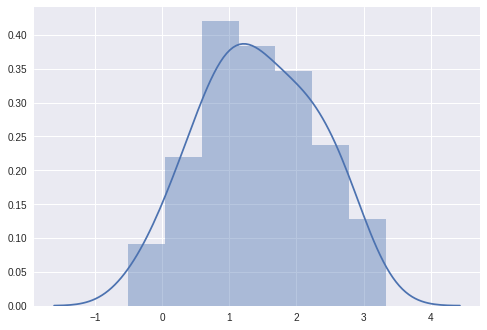

In [108]:
sample100 = sns.distplot(samples_mean,kde=True)

In [0]:
samples2_mean = []
samples2_std = []
j2 = 0
itr2 = 0
while itr2 < 10000:
  j2 += 1
  sample = flights.arr_delay.sample(n=1000, random_state=j2)
  sample_mean = sample.mean()
  sample_std = sample.std()
  samples2_mean.append(sample_mean)
  samples2_std.append(sample_std)
  itr2 += 1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


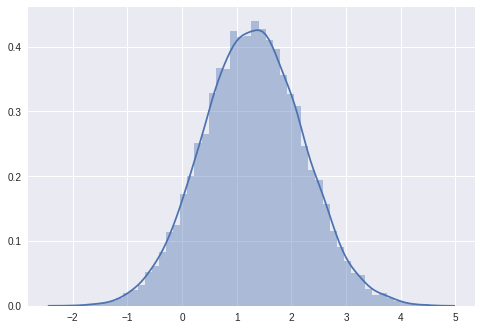

In [119]:
sample10000 = sns.distplot(samples2_mean,kde=True)

In [120]:
#The Central Limit Theorem (CLT) is a statistical theory states that given a sufficiently large 
#sample size from a population with a finite level of variance, the mean of all 
#samples from the same population will be approximately equal to the mean of the population.

print("Mean of 10000 random samples = ",pd.Series(samples2_mean).mean())
print("Entire population mean = ",flights.arr_delay.mean())
print("Means are approximately equal")

# Larger the sample size the closer would be the sample's mean to the populations mean as proved above
# Increase in sample size leads to smaller spread in sampling distribution

Mean of 10000 random samples =  1.297546600000001
Entire population mean =  1.2971391991523553
Means are approximately equal
